In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from prepared_data.get_prepared_data import get_prepared_data
from prepared_data.prepared_test_results import result_predict_prob_to_dataFrame, not_duplicate_elements_in_dataframes

/home/andrzej/PycharmProjects/Football-match-probability-prediction/prepared_data/get_prepared_data.py:2: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  from prepared_data.completed_missing_data import completed_missing_data, convert_historical_date_to_date_difference, \


percent of object with nan value and orginals:  42.20, 100.000000
remove history columns [7, 8, 9, 10]
percent of object with nan value and orginals:  35.06, 100.000000
remove object with more that  col 50 % empty...
percent of object with nan value and orginals:  35.06, 100.000000
date to datetime type and remove nan date....
percent of object with nan value and orginals:  27.25, 89.274189
filna coach_id and change to is new coach
percent of object with nan value and orginals:  0.75, 89.274189
fill zero nan data
percent of object with nan value and orginals:  0.00, 89.274189


In [2]:
train_org = pd.read_csv('data/train.csv')
train, league_mean_ratting_all, teams_ratting_all = get_prepared_data(train_org)
teams_ratting_all

/home/andrzej/PycharmProjects/Physionet_Challenge_2021/venv/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3251: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


percent of object with nan value and orginals:  42.20, 100.000000
remove history columns [9, 10]
percent of object with nan value and orginals:  38.76, 100.000000
remove object with more that  col 50 % empty...
percent of object with nan value and orginals:  38.76, 100.000000
date to datetime type and remove nan date....
percent of object with nan value and orginals:  28.72, 85.915556
filna coach_id and change to is new coach
percent of object with nan value and orginals:  1.20, 85.915556
fill zero nan data
percent of object with nan value and orginals:  0.00, 85.915556


,0,07 Vestur,1. FC M'gladbach,1. FC Merseburg,1. Maj Ruma,12 de Octubre,1860 München,1860 München II,1860 Rosenheim,1877 Alemdağspor,...,Yafoot,Zhlobin,Älvsjö AIK W,Åland,Åland United W,Çarşambaspor,Épila,Érdi VSE,ÍBU,Úlfarnir
home_team_history_rating_1,3.070815,8.247721,4.735950,6.974668,1.461400,4.542867,6.439402,10.189010,4.729081,5.064542,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
away_team_history_rating_1,5.667507,7.350362,5.972467,8.583335,6.199050,4.885013,6.937842,5.554950,5.221107,5.156260,...,2.763339,7.265364,6.075592,8.049517,9.545010,5.111615,5.158081,6.589200,8.078382,10.728200
home_team_history_rating_2,5.850329,8.532616,5.355725,8.814662,8.418200,4.806454,6.645256,8.547972,6.101598,5.369217,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
away_team_history_rating_2,7.775267,6.908470,4.735950,7.365322,1.461400,4.706100,6.555754,10.189010,4.729081,4.852948,...,3.138267,4.723370,6.024660,15.266450,8.516831,5.548759,4.480228,4.234285,13.150767,5.642425
home_team_history_rating_3,5.221400,8.856112,5.640194,7.341014,6.241900,4.900469,6.584791,3.752905,5.065149,4.913009,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
away_team_history_rating_3,4.871950,6.748184,5.355725,8.191349,8.418200,4.714871,6.619288,8.547972,6.101598,4.943627,...,3.452772,7.576471,5.600462,14.171193,9.446250,5.546972,4.844197,7.339883,10.740400,10.147982
home_team_history_rating_4,4.541867,7.934810,8.042094,8.578879,8.027725,4.863077,6.447406,7.416014,6.443605,5.103263,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
away_team_history_rating_4,6.230704,9.464661,5.640194,7.796437,6.241900,4.784917,6.645606,3.752905,5.065149,5.249407,...,3.950805,7.358263,6.503723,10.280550,9.850811,6.028750,5.636585,3.515693,5.005294,15.036395
home_team_history_rating_5,5.063669,7.697220,6.610879,7.810133,7.392300,5.200468,6.806721,8.368990,5.604541,5.400142,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
away_team_history_rating_5,6.655800,9.794950,8.042094,8.313656,8.027725,4.645906,6.315494,7.416014,6.443605,4.768613,...,3.679646,8.715285,9.157685,11.081358,9.447794,5.883482,4.749920,7.423083,5.087044,6.719700


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameter (CV score=0.491):
{'logistic__C': 0.0001, 'pca__n_components': 60}


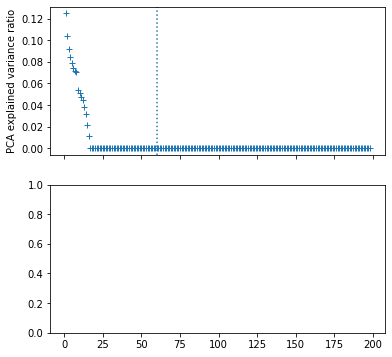

In [3]:


# Define a pipeline to search for the best combination of PCA truncation
# and classifier regularization.
pca = PCA()
# Define a Standard Scaler to normalize inputs
scaler = StandardScaler()

# set the tolerance to a large value to make the example faster
logistic = LogisticRegression(max_iter=10000, tol=0.1)
pipe = Pipeline(steps=[("scaler", scaler), ("pca", pca), ("logistic", logistic)])

# X_digits, y_digits = datasets.load_digits(return_X_y=True)
# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    "pca__n_components": [5, 15, 30, 45, 60],
    "logistic__C": np.logspace(-4, 4, 4),
}
search = GridSearchCV(pipe, param_grid, n_jobs=-1, verbose=3)
search.fit(train.iloc[:, 1:], train.iloc[:, 0])
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

# Plot the PCA spectrum
pca.fit(train.iloc[:, 1:])

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(
    np.arange(1, pca.n_components_ + 1), pca.explained_variance_ratio_, "+", linewidth=2
)
ax0.set_ylabel("PCA explained variance ratio")

ax0.axvline(
    search.best_estimator_.named_steps["pca"].n_components,
    linestyle=":",
    label="n_components chosen",
)
plt.show()

In [4]:
test_org = pd.read_csv('data/test.csv')
test, _, _ = get_prepared_data(test_org, 8, league_mean_ratting_all, teams_ratting_all)
test

percent of object with nan value and orginals:  39.35, 100.000000
remove history columns [9, 10]
percent of object with nan value and orginals:  37.84, 100.000000
remove object with more that  col 50 % empty...
percent of object with nan value and orginals:  37.84, 100.000000
date to datetime type and remove nan date....
percent of object with nan value and orginals:  30.36, 89.256096
filna coach_id and change to is new coach
percent of object with nan value and orginals:  0.46, 89.256096
fill zero nan data
percent of object with nan value and orginals:  0.00, 89.256096


,is_cup,home_team_history_match_date_1,home_team_history_match_date_2,home_team_history_match_date_3,home_team_history_match_date_4,home_team_history_match_date_5,home_team_history_match_date_6,home_team_history_match_date_7,home_team_history_match_date_8,home_team_history_is_play_home_1,...,home_team_history_target_7_1.0,away_team_history_target_7_-1.0,away_team_history_target_7_0.0,away_team_history_target_7_1.0,home_team_history_target_8_-1.0,home_team_history_target_8_0.0,home_team_history_target_8_1.0,away_team_history_target_8_-1.0,away_team_history_target_8_0.0,away_team_history_target_8_1.0
id,,,,,,,,,,,,,,,,,,,,,
18139735,True,97,93,97,146,72,243,813,117,0.0,...,1,0,0,1,1,0,0,1,0,0
18137442,True,98,123,213,71,97,336,96,94,0.0,...,1,0,0,1,0,0,1,0,1,0
18304452,True,72,94,76,70,194,166,144,912,1.0,...,1,0,1,0,0,1,0,0,1,0
18219408,True,97,71,98,67,124,96,120,94,1.0,...,1,0,0,1,0,0,1,0,0,1
18395549,True,94,123,94,95,338,144,168,168,0.0,...,1,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18109223,False,240,168,119,264,412,625,384,408,0.0,...,0,0,1,0,0,0,1,1,0,0
18148017,False,336,287,264,552,316,600,119,120,1.0,...,0,0,1,0,0,0,1,0,0,1
18125499,False,169,118,0,119,144,0,191,359,0.0,...,0,1,0,0,0,1,0,1,0,0


In [5]:
target = train['target']
X_train_org = train.drop('target', axis=1)
pipe = make_pipeline(MinMaxScaler(),
                     LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr', max_iter=1000, n_jobs=-1))
pipe.fit(X_train_org, target)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('logisticregression',
                 LogisticRegression(max_iter=1000, multi_class='ovr', n_jobs=-1,
                                    random_state=0))])

In [6]:
test_result = pipe.predict_proba(test)
test_result = result_predict_prob_to_dataFrame(test_result, test)
test_result

/home/andrzej/PycharmProjects/Physionet_Challenge_2021/venv/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- is_cup
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


ValueError: X has 199 features, but MinMaxScaler is expecting 198 features as input.

Training for nan value

In [ ]:
train_org = pd.read_csv('data/train.csv')
train, _, _ = get_prepared_data(train_org, number_of_history_matches=1)
test_org = pd.read_csv('data/test.csv')
test_history_1, _, _ = get_prepared_data(test_org, number_of_history_matches=1,
                                         league_mean_ratting_all=league_mean_ratting_all,
                                         teams_mean_ratting_all=teams_ratting_all)
test_history_1 = not_duplicate_elements_in_dataframes(test_history_1.reset_index(), test)
test_history_1

In [ ]:
target = train['target']
X_train_org = train.drop('target', axis=1)
pipe = make_pipeline(MinMaxScaler(),
                     LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr', max_iter=1000, n_jobs=-1))
pipe.fit(X_train_org, target)

In [ ]:
test_result_history_1 = pipe.predict_proba(test_history_1)
test_result_history_1 = result_predict_prob_to_dataFrame(test_result_history_1, test_history_1)
test_result_history_1

In [ ]:
from prepared_data.prepared_test_results import append_test_results

test_result_learn = append_test_results(test_result_history_1, test_result)
test_result_learn

In [ ]:
from prepared_data.prepared_test_results import completed_test_result_and_save

result_all = completed_test_result_and_save(test_org, test_result_learn, 'logist_regression_history_8_+_1')
result_all.shape[0] == test_org.shape[0]
